# Prepare a model on fraud data 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV

In [2]:
df=pd.read_csv('E:/DATA SCI ASSI/disigan tree/Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


#  EDA

<AxesSubplot:>

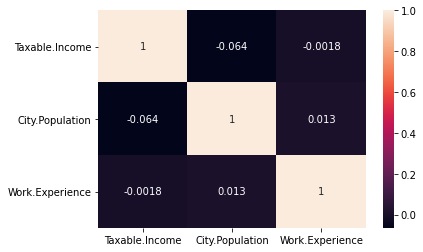

In [22]:
sns.heatmap(df.corr(),annot=True)

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64


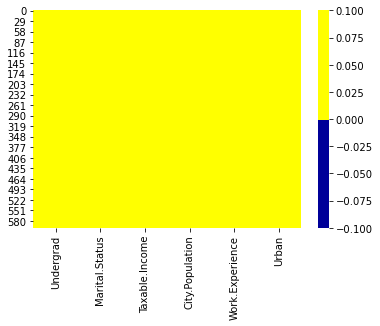

In [4]:
# check missing values
import seaborn as sns
cols = df.columns 
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(),cmap=sns.color_palette(colours))
print(df.isna().sum())

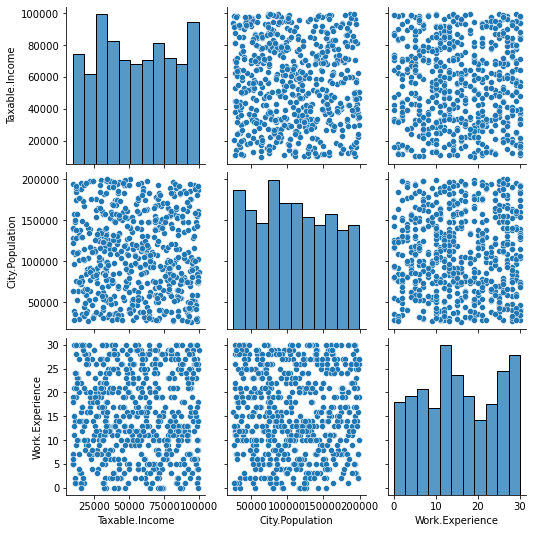

In [24]:
sns.pairplot(df)

In [25]:
df['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [26]:
Mx=df['Taxable.Income'].max()
Mn=df['Taxable.Income'].min()
print('Max_TaxableIncome=',Mx)
print('Min_TaxableIncome=',Mn)

Max_TaxableIncome= 99619
Min_TaxableIncome= 10003


In [27]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [5]:
dt=df.rename({'Taxable.Income':'TaxableIncome'},axis=1)

In [6]:
### FEATURE ENG.
label_encoder =LabelEncoder()
dt['TaxableIncome']= label_encoder.fit_transform(dt['TaxableIncome']<= 30000 ) 
# 0=Good
# 1=Risky

#filling categorical variable with dummy values

dd=pd.get_dummies(dt,columns=['Undergrad','Marital.Status','Urban']) 
dd

,TaxableIncome,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,0,50047,10,1,0,0,0,1,0,1
1,0,134075,18,0,1,1,0,0,0,1
2,0,160205,30,1,0,0,1,0,0,1
3,0,193264,15,0,1,0,0,1,0,1
4,0,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,0,39492,7,0,1,1,0,0,0,1
596,0,55369,2,0,1,1,0,0,0,1
597,0,154058,0,1,0,1,0,0,0,1
598,0,180083,17,0,1,0,1,0,1,0


In [7]:
dd['TaxableIncome'].value_counts()

0    476
1    124
Name: TaxableIncome, dtype: int64

In [13]:
X = dd.drop(columns=['TaxableIncome'])
Y = dd['TaxableIncome']

In [14]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler()
x,y=os.fit_resample(X,Y)


In [15]:
from collections import Counter
print('original dataset shape{}'. format(Counter(Y)))
print('Resampled dataset shape{}'. format(Counter(y)))

original dataset shapeCounter({0: 476, 1: 124})
Resampled dataset shapeCounter({0: 476, 1: 476})


In [43]:
# Balancing the data
nofraud = dd[dd.TaxableIncome == 0].index
fraud = np.array(dd[dd['TaxableIncome'] == 1].index)

random_index = np.array(np.random.choice(fraud, len(nofraud)))

oversample = np.concatenate([nofraud, random_index])

oversample = dd.iloc[oversample, :]

x = oversample.drop(columns=['TaxableIncome'])
y = oversample['TaxableIncome']



In [17]:
# Build multiple models
import warnings
warnings.filterwarnings('ignore')

models={"DecisionTreeClassifier":DecisionTreeClassifier(),"SVM":SVC()
        ,"KNN":KNeighborsClassifier(),"GNB":GaussianNB(),"RandomForestClassifier":RandomForestClassifier(),
       "AdaBoostClassifier":AdaBoostClassifier(),"GradientBoostingClassifier":GradientBoostingClassifier(),
       "XGBClassifier":XGBClassifier()}
#modelAccuracy-> models,x,y,scaleFlag=0,1,2
def modelAccuracy(models,x,y,scaleFlag):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
    acc_result={}
    for name,model in models.items():
        if(scaleFlag==1):
            model_pipeline=Pipeline([("MinMax",MinMaxScaler()),('model',model)])
        elif(scaleFlag==2):
            model_pipeline=Pipeline([("standardScaler",StandardScaler()),('model',model)])
        else:
            model_pipeline=Pipeline([('model',model)])
        #model train and prediction
        model_fit=model_pipeline.fit(xtrain,ytrain)
        ypred=model_fit.predict(xtest)
        acc=accuracy_score(ytest,ypred)
        print("The Accuracy for ",name," is :",acc)
        acc_result[name]=acc
    return acc_result

#pass the input prameter
Norm=modelAccuracy(models,x,y,0)
MS=modelAccuracy(models,x,y,1)
ST=modelAccuracy(models,x,y,2)


The Accuracy for  DecisionTreeClassifier  is : 0.7801047120418848
The Accuracy for  SVM  is : 0.5706806282722513
The Accuracy for  KNN  is : 0.6701570680628273
The Accuracy for  GNB  is : 0.5287958115183246
The Accuracy for  RandomForestClassifier  is : 0.8638743455497382
The Accuracy for  AdaBoostClassifier  is : 0.6230366492146597
The Accuracy for  GradientBoostingClassifier  is : 0.675392670157068
[23:15:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The Accuracy for  XGBClassifier  is : 0.8272251308900523
The Accuracy for  DecisionTreeClassifier  is : 0.8010471204188482
The Accuracy for  SVM  is : 0.5235602094240838
The Accuracy for  KNN  is : 0.5916230366492147
The Accuracy for  GNB  is : 0.5235602094240838
The Accuracy for  Rand

In [18]:
# find High Accuracy Model
def bestModel(model_result):
    high=0
    for name,acc in model_result.items():
        if acc>high:
            high=acc
            model_name=name
    print("Best model is ",model_name," with Accuracy ",high)
    
print('=Without Scaling',bestModel(Norm))
print('=MIN MAX Scaling',bestModel(MS))
print('= STD Scaling',bestModel(ST))

Best model is  RandomForestClassifier  with Accuracy  0.8638743455497382
=Without Scaling None
Best model is  RandomForestClassifier  with Accuracy  0.8324607329842932
=MIN MAX Scaling None
Best model is  RandomForestClassifier  with Accuracy  0.8324607329842932
= STD Scaling None


# Evaluation of Best Model on testing Dataset

Accuracy is : 0.8481675392670157
              precision    recall  f1-score   support

           0       0.96      0.73      0.83        97
           1       0.78      0.97      0.86        94

    accuracy                           0.85       191
   macro avg       0.87      0.85      0.85       191
weighted avg       0.87      0.85      0.85       191



<AxesSubplot:>

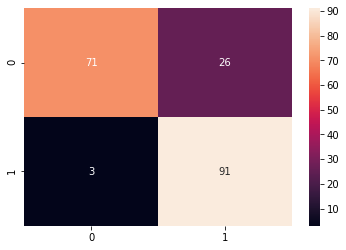

In [19]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
Model=RandomForestClassifier()
Model.fit(xtrain,ytrain)
ypred=Model.predict(xtest)
print("Accuracy is :",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)